In [1]:
##########################################################################################################################
##  Importing the necessary libraries:                                                                                  ##
##########################################################################################################################

import os
import numpy as np
from sklearn.model_selection import train_test_split
import random
from termcolor import colored
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as misno
import time
import warnings
warnings.filterwarnings("ignore")

# Evaluation module:
import evaluation_module as eval_mod

The results are save to -  C:\Users\Haribaskar.d\Desktop\Happiest Minds\NHA Vitals\NHA-PythonCode\code\Generalised_code\evaluation_result.xlsx


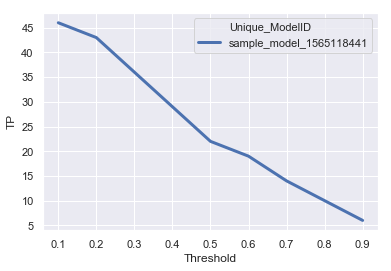

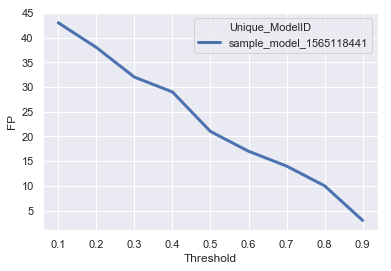

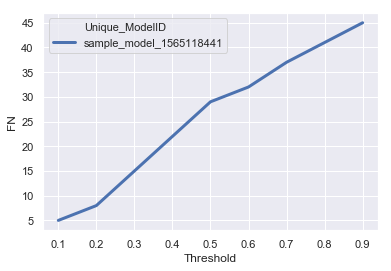

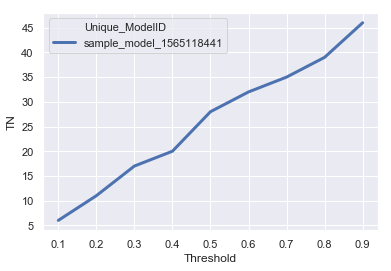

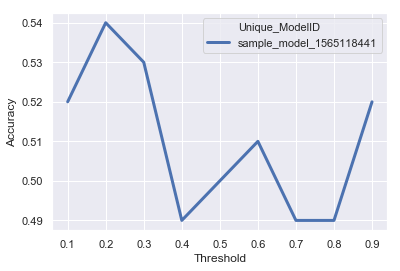

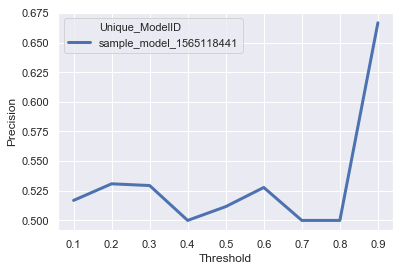

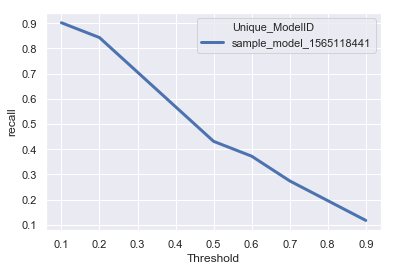

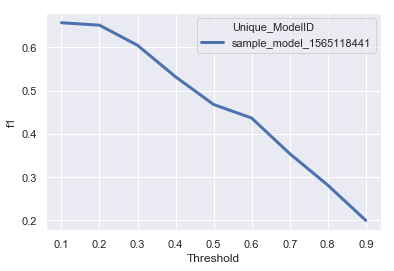

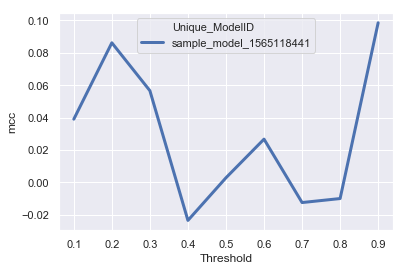

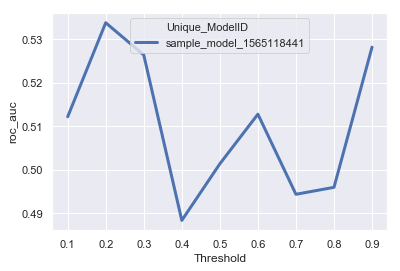

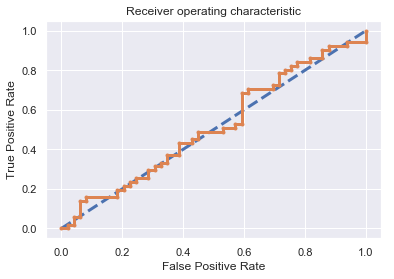

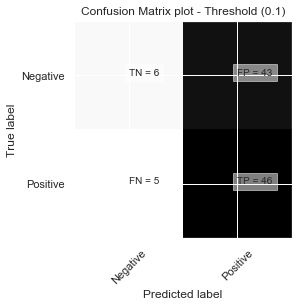

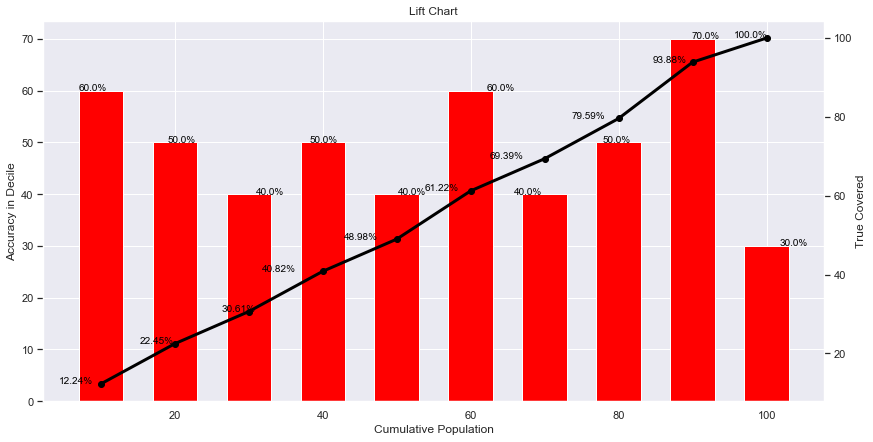

,Unique_ModelID,Model_Reference_name,Threshold,TP,FP,FN,TN,Accuracy,Precision,recall,f1,mcc,roc_auc,actual_pred_details,Time_stamp
0,sample_model_1565118441,sample_model,0.1,46,43,5,6,0.52,0.516854,0.901961,0.657143,0.038999,0.512205,"{'actual': [1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0...",2019-08-06 19:07:21
1,sample_model_1565118441,sample_model,0.2,43,38,8,11,0.54,0.530864,0.843137,0.651515,0.086176,0.533814,"{'actual': [1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0...",2019-08-06 19:07:21
2,sample_model_1565118441,sample_model,0.3,36,32,15,17,0.53,0.529412,0.705882,0.605042,0.056606,0.526411,"{'actual': [1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0...",2019-08-06 19:07:21
3,sample_model_1565118441,sample_model,0.4,29,29,22,20,0.49,0.500000,0.568627,0.532110,-0.023507,0.488395,"{'actual': [1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0...",2019-08-06 19:07:21
4,sample_model_1565118441,sample_model,0.5,22,21,29,28,0.50,0.511628,0.431373,0.468085,0.002828,0.501401,"{'actual': [1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0...",2019-08-06 19:07:21
5,sample_model_1565118441,sample_model,0.6,19,17,32,32,0.51,0.527778,0.372549,0.436782,0.026672,0.512805,"{'actual': [1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0...",2019-08-06 19:07:21
6,sample_model_1565118441,sample_model,0.7,14,14,37,35,0.49,0.500000,0.274510,0.354430,-0.012475,0.494398,"{'actual': [1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0...",2019-08-06 19:07:21
7,sample_model_1565118441,sample_model,0.8,10,10,41,39,0.49,0.500000,0.196078,0.281690,-0.010002,0.495998,"{'actual': [1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0...",2019-08-06 19:07:21
8,sample_model_1565118441,sample_model,0.9,6,3,45,46,0.52,0.666667,0.117647,0.200000,0.098558,0.528211,"{'actual': [1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0...",2019-08-06 19:07:21


,decile,count_actual_true,total_count_in_decile,Accuracy_in_decile,Total_true_in_population,True_covered,min_confidence,max_confidence,cum_sum_count_actual_T,Pop,lift
0,1,6,10,60.0,49,12.244898,0.005691,0.085900,6,10.0,1.224490
1,2,5,10,50.0,49,22.448980,0.093780,0.212790,11,20.0,1.122449
2,3,4,10,40.0,49,30.612245,0.213003,0.289564,15,30.0,1.020408
3,4,5,10,50.0,49,40.816327,0.292926,0.366768,20,40.0,1.020408
4,5,4,10,40.0,49,48.979592,0.373111,0.446766,24,50.0,0.979592
5,6,6,10,60.0,49,61.224490,0.451339,0.532453,30,60.0,1.020408
6,7,4,10,40.0,49,69.387755,0.556047,0.665337,34,70.0,0.991254
7,8,5,10,50.0,49,79.591837,0.666897,0.797322,39,80.0,0.994898
8,9,7,10,70.0,49,93.877551,0.810450,0.887187,46,90.0,1.043084
9,10,3,10,30.0,49,100.000000,0.888379,0.994518,49,100.0,1.000000


In [2]:
##########################################################################################################################
##  Testing the Evaluation module and getting the confusion matrix:                                                     ##                                                                                  ##
##########################################################################################################################

## Sample data: (Actual_value/ Predicted_probablity values)
random.seed(9005)
pred_prob = [random.uniform(0,1) for i in range(100) ]
actual = [random.sample(range(0,2),1)[0] for i in range(100)]

# Initializing the module:
evalu = eval_mod.ModelEvaluation(actual = actual, pred = pred_prob, threshold = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

# Model evaluation call:
metrics_db,decile_db = evalu.evaluate(evaluate_save=True,plots_show=True,model_class=0, bins = 10)
display(metrics_db)
display(decile_db)

In [5]:
##################################################
## Creating a sample data to compare the models:
##################################################

## Sample data: (Actual_value/ Predicted_probablity values)
random.seed(95)
pred_prob1 = [random.uniform(0,1) for i in range(100) ]

# Initializing the module:
evalu = eval_mod.ModelEvaluation(actual = actual, pred = pred_prob1, threshold = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

# Model evaluation call:
metrics_db1,decile_db = evalu.evaluate(evaluate_save=True,plots_show=False)

##################################################
## Final DB with two model data:
##################################################

metric_DB = pd.concat([metrics_db,metrics_db1], axis = 0).reset_index(drop=True)
display(metric_DB)

The results are save to -  C:\Users\Haribaskar.d\Desktop\Happiest Minds\NHA Vitals\NHA-PythonCode\code\Generalised_code\evaluation_result.xlsx


,Unique_ModelID,Model_Reference_name,Threshold,TP,FP,FN,TN,Accuracy,Precision,recall,f1,mcc,roc_auc,actual_pred_details,Time_stamp
0,sample_model_1565118441,sample_model,0.1,46,43,5,6,0.52,0.516854,0.901961,0.657143,0.038999,0.512205,"{'actual': [1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0...",2019-08-06 19:07:21
1,sample_model_1565118441,sample_model,0.2,43,38,8,11,0.54,0.530864,0.843137,0.651515,0.086176,0.533814,"{'actual': [1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0...",2019-08-06 19:07:21
2,sample_model_1565118441,sample_model,0.3,36,32,15,17,0.53,0.529412,0.705882,0.605042,0.056606,0.526411,"{'actual': [1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0...",2019-08-06 19:07:21
3,sample_model_1565118441,sample_model,0.4,29,29,22,20,0.49,0.500000,0.568627,0.532110,-0.023507,0.488395,"{'actual': [1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0...",2019-08-06 19:07:21
4,sample_model_1565118441,sample_model,0.5,22,21,29,28,0.50,0.511628,0.431373,0.468085,0.002828,0.501401,"{'actual': [1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0...",2019-08-06 19:07:21
5,sample_model_1565118441,sample_model,0.6,19,17,32,32,0.51,0.527778,0.372549,0.436782,0.026672,0.512805,"{'actual': [1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0...",2019-08-06 19:07:21
6,sample_model_1565118441,sample_model,0.7,14,14,37,35,0.49,0.500000,0.274510,0.354430,-0.012475,0.494398,"{'actual': [1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0...",2019-08-06 19:07:21
7,sample_model_1565118441,sample_model,0.8,10,10,41,39,0.49,0.500000,0.196078,0.281690,-0.010002,0.495998,"{'actual': [1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0...",2019-08-06 19:07:21
8,sample_model_1565118441,sample_model,0.9,6,3,45,46,0.52,0.666667,0.117647,0.200000,0.098558,0.528211,"{'actual': [1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0...",2019-08-06 19:07:21
9,sample_model_1565118511,sample_model,0.1,48,46,3,3,0.51,0.510638,0.941176,0.662069,0.005054,0.501200,"{'actual': [1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0...",2019-08-06 19:08:31


In [6]:
multiple_prob_data = pd.DataFrame()
multiple_prob_data['actual'] = actual
multiple_prob_data['model1'] = pred_prob
multiple_prob_data['model2'] = pred_prob1

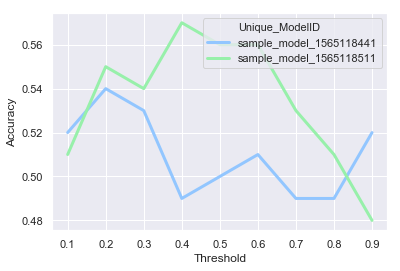

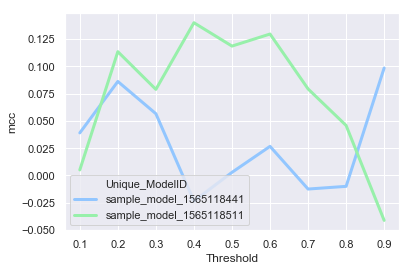

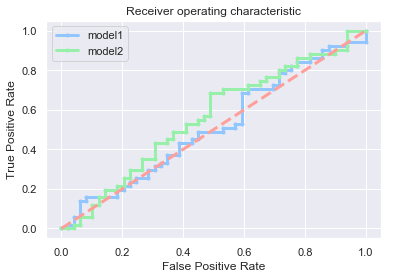

In [7]:
##################################################
## Executing the model Comparison module
##################################################
evalu.Compare_models(evaluate_db = metric_DB, model_id = list(metric_DB['Unique_ModelID'].unique()),
                     comparison_metrics = ['Accuracy','mcc'],multiple_prob_data=multiple_prob_data, actual_column_name='actual', pred_column_name=['model1','model2'])

In [ ]:
################################################################################################################################
##                                             END - EVALUATION MODULE                                                        ##
################################################################################################################################

In [ ]:
import functools

class SwitchedDecorator:
    def __init__(self, enabled_func):
        self._enabled = False
        self._enabled_func = enabled_func

    @property
    def enabled(self):
        return self._enabled

    @enabled.setter
    def enabled(self, new_value):
        if not isinstance(new_value, bool):
            raise ValueError("enabled can only be set to a boolean value")
        self._enabled = new_value

    def __call__(self, function):
        if self._enabled:
            return self._enabled_func(function)
        return target

def decorate(function):
    actual = 3
    pred = 0.5
    def wrap_function(actual,pred):
        print("your function has been wrapped")
        return function(actual,pred)
    functools.update_wrapper(wrap_function, function)
    return wrap_function

@decorate
def print_message(actual,pred):
    print(actual+pred)
    
    
# def deco_func(target):
#     """This is the actual decorator function.  It's written just like any other decorator."""
#     def g(*args,**kwargs):
#         print("your function has been wrapped")
#         return target(*args,**kwargs)
#     functools.update_wrapper(g, target)
#     return g

In [ ]:
# This is where we wrap our decorator in the SwitchedDecorator class.
my_decorator = SwitchedDecorator(decorate)
my_decorator.enabled=True
print_message(actual=10,pred=10)

In [ ]:
# feature importance
# auc_roc curve
# decile chart
# decorator - h20

In [ ]:
## Training pipeline


In [ ]:
## create training job

In [ ]:
## sage maker

In [ ]:
# import trainer
# dbconfigjson ={"userid", 'pwd'}
# trainer.load(dbconfigjson)
# session = trainer.session()
# session.train("E:\nha_training.py")
# session.train(nha_training())

In [ ]:
## prediction pipeline - continious monitoring